In [2]:
import sys
sys.path.append("/cluster/home/yhgong/")

import matplotlib.pyplot as plt
import numpy as np

from python.modules import *
plt.style.use('default')

In [3]:
simPath: str = "/lfs/data/yhgong/productionRun/single/HD/Cooling_Feedback_ContiRandom15"
hdf5Prefix: str = "perseus_merger_hdf5_plt_cnt"

### Turbulence Heating

In [4]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.TurbulenceHeating,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=TurbulenceHeatingProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=100,
            rStepKpc=10,
            shape=Shape.Box,
            tMyr=1000,
            rhoIndex=0
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-06 12:31:00,324 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-06 12:31:00,474 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-06 12:31:00,475 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-06 12:31:00,477 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-06 12:31:00,478 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-06 12:31:00,479 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-06 12:31:08,034 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-06 12:31:08,116 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-06 12:31:08,117 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-06 12:31:08,119 Parameters: domain_left_edge          = [-1.23424e+25 -

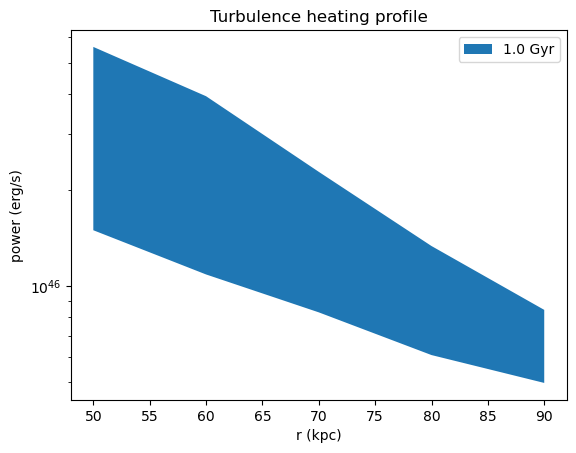

In [5]:
fig, ax = plt.subplots()

ax.fill_between(result.x, result.value.upperLimit, result.value.lowerLimit, \
    label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Turbulence heating profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel("power (erg/s)")
ax.set_yscale("log")
ax.legend()

### X-ray emissivity

#### Box

In [6]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=200,
            rStepKpc=10,
            shape=Shape.Box,
            tMyr=1000,
            gasProperty=GasField.Emissivity
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-06 12:32:11,833 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-06 12:32:11,906 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-06 12:32:11,907 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-06 12:32:11,908 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-06 12:32:11,909 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-06 12:32:11,910 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-06 12:32:16,057 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-06 12:32:16,060 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-06 12:32:16,061 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-06 12:32:16,111 Adding ('gas','xray_emissivity_0.5_7.0_keV') fiel

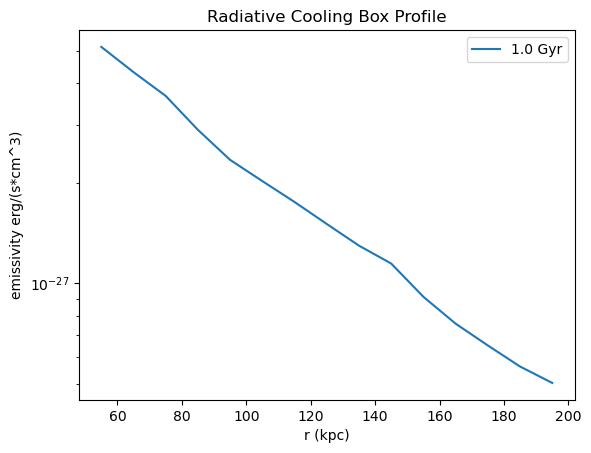

In [8]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling Box Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"emissivity {result.valueUint}")
ax.set_yscale("log")
ax.legend()

In [9]:
# The radiative cooling rate at r<50 kpc box
result.value[0]*(100*Constants.kpc)**3

1.508068574950637e+44

#### Sphere

In [10]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=50,
            rEndKpc=200,
            rStepKpc=10,
            shape=Shape.Sphere,
            tMyr=1000,
            gasProperty=GasField.Emissivity
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-06 12:33:32,137 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-06 12:33:32,211 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-06 12:33:32,212 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-06 12:33:32,213 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-06 12:33:32,214 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-06 12:33:32,215 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-05-06 12:33:36,518 Loading emissivity data from ./apec_emissivity_v3.h5
yt : [INFO     ] 2024-05-06 12:33:36,520 X-ray emissivity data calculated with APEC 3.0.9 on 11/19/2019 by John ZuHone.
yt : [INFO     ] 2024-05-06 12:33:36,521 X-ray 'apec' emissivity data version: 3.
yt : [INFO     ] 2024-05-06 12:33:36,542 Adding ('gas','xray_emissivity_0.5_7.0_keV') fiel

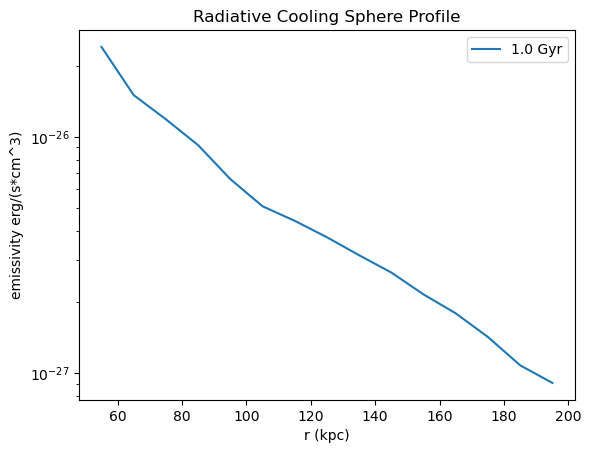

In [12]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Radiative Cooling Sphere Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"emissivity {result.valueUint}")
ax.set_yscale("log")
ax.legend()

In [13]:
# The radiative cooling rate at r<50 kpc sphere
result.value[0]*4/3*(50*Constants.kpc)**3

1.174067269025402e+44

### Temperature

In [14]:
result = ProfileAnalyzor() \
    .setInputs(
        profileMode=ProfileMode.GasProperty,
        simFile=SimFileModel(
            simPath=simPath,
            hdf5FilePrefix=hdf5Prefix,
            fileSterMyr=1
        ),
        calculationInfo=GasPropertyProfileCalculationInfoModel(
            rStartKpc=0,
            rEndKpc=1000,
            rStepKpc=10,
            shape=Shape.Sphere,
            tMyr=1000,
            gasProperty=GasField.Temperature
        )
    ) \
    .getData()

yt : [INFO     ] 2024-05-06 12:34:47,191 Particle file found: perseus_merger_hdf5_part_1000
yt : [INFO     ] 2024-05-06 12:34:47,263 Parameters: current_time              = 3.155709646823747e+16
yt : [INFO     ] 2024-05-06 12:34:47,264 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2024-05-06 12:34:47,265 Parameters: domain_left_edge          = [-1.23424e+25 -1.23424e+25 -1.23424e+25]
yt : [INFO     ] 2024-05-06 12:34:47,266 Parameters: domain_right_edge         = [1.23424e+25 1.23424e+25 1.23424e+25]
yt : [INFO     ] 2024-05-06 12:34:47,267 Parameters: cosmological_simulation   = 0


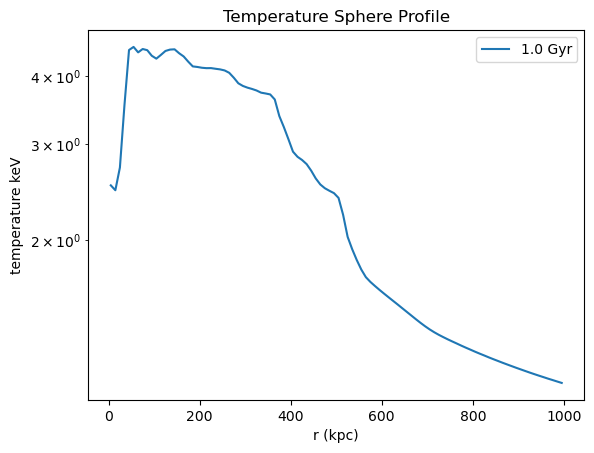

In [15]:
fig, ax = plt.subplots()

ax.plot(result.x, result.value, label=f"{result.label[0]} {result.label[1]}")
ax.set_title("Temperature Sphere Profile")
ax.set_xlabel("r (kpc)")
ax.set_ylabel(f"temperature {result.valueUint}")
ax.set_yscale("log")
ax.legend()